In [1]:
import pandas as pd
from pyautomlib.preprocess import DataProcessor
from pyautomlib.config import PreprocessModel,RegressionModel
from pyautomlib.regression import Regression

In [2]:
df = pd.read_csv("datasets/pga.csv")
df.head()

,MW,FaultType,Rjb,VS30,PGA
0,3.4,Ters Oblik Atımlı,11.99,423.11,0.004148
1,3.4,Ters Oblik Atımlı,85.59,347.00,0.000213
2,3.4,Ters Oblik Atımlı,213.84,361.00,0.000085
3,3.4,Ters Oblik Atımlı,72.56,461.00,0.000369
4,3.4,Ters Oblik Atımlı,85.21,505.00,0.000820


In [10]:
df.replace("Ters Oblik Atımlı", "Ters", inplace=True)
df.replace("Ters Eğim Atımlı", "Ters", inplace=True)
df.replace("Yanal Atımlı", "Yanal", inplace=True)
df.replace("Normal Oblik Atımlı", "Normal", inplace=True)
df.replace("Normal Eğim Atımlı", "Normal", inplace=True)

In [15]:
pm = PreprocessModel()
dp = DataProcessor(df,pm,"PGA")
df_processed = dp.process_data()
df_processed.head()

,MW,Rjb,VS30,PGA,FaultType_Ters,FaultType_Yanal
3,-1.039687,-0.291587,0.183270,-0.785744,1,0
10,-1.039687,-0.396174,-0.287500,-0.749264,1,0
28,-1.039687,0.457180,1.837290,-1.070655,1,0
30,-1.039687,1.613340,1.872733,-1.287505,1,0
32,-1.039687,0.737927,-0.547348,-1.017625,1,0


In [16]:
x_train, x_test, y_train, y_test = dp.split_data()

In [18]:
regressor = Regression(x_train,y_train,RegressionModel())
model = regressor.create_model()

Base Models....
Best 3 models: ['GBM', 'RF', 'SVR']
Hyperparameter Optimization....
GBM best score : 0.9536

RF best score : 0.9506

SVR best score : 0.9535

R2: 0.9576967022924728


In [20]:
from sklearn.metrics import r2_score

y_predict = model.predict(x_test)
test_score = r2_score(y_test, y_predict)
print("test_score = ", test_score)

test_score =  0.9580563939195197


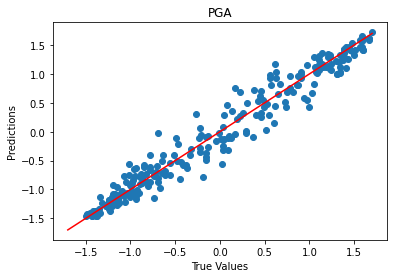

In [21]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_predict)
plt.plot([-1.7, 1.7], [-1.7, 1.7], color='red')
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("PGA")
plt.show()
plt.close()

In [24]:
regressor.save_model("pga_model")